# How to code and Polars DataFrames

Lecture, April 28, 2025

## Part 1: how to code and avoid spaghetti code

**What is Spaghetti Code?**

Spaghetti code refers to tangled, poorly structured code that is difficult to understand or maintain. It typically lacks logical organization, relies heavily on interdependent sections, and makes debugging and scaling complex.

**Symptoms of Spaghetti Code:**

- Long, unstructured scripts without functions or classes.
- Code with deep nesting of `if`, `for`, or `while` blocks.
- Repeated patterns instead of reusable functions.
- Lack of comments or documentation.

**Why is it a Problem in Data Processing?**

- **Data Volume Increases Complexity**: As datasets grow larger, unstructured code becomes harder to debug.
- **Collaboration Challenges**: Team members may struggle to understand or contribute to tangled code.
- **Risk of Bugs**: A minor change can introduce unpredictable side effects.

**Q:**

- What is the DRY principle?
- When can be spaghetti code good?

**Short Demonstration:**

Spaghetti code example for processing a dataset:

In [1]:
data = [1, 2, 3, 4, 5]
results = []
for i in range(len(data)):
    if data[i] % 2 == 0:
        results.append(data[i] * 2)
    else:
        results.append(data[i] + 3)
print(results)

[4, 4, 6, 8, 8]


**Q:** What makes this code hard to read or maintain?

## Prior notes to help with coding

- Minimal arguments: `def func_run(x, y, z, another, anotherx, ano, why_this):`
- Logical separation: white spaces, empty lines, functions related to each other close 
- Extraction of subrutines
- Type arguments `x: list` , `x : pd.DataFrame`
- Name conventions

## Core Principles of Clean Coding

**2.1 Code Readability:**

- Follow [PEP 8 standards](https://peps.python.org/pep-0008/), or [realpython pep8](https://realpython.com/python-pep8/):
    - Indentation: Use 4 spaces per level.
    - Line length: Limit to 79 characters.
    - Use meaningful variable names: `data` instead of `x`, `process_even` instead of `pe`.
- Keep logic simple and intuitive. Avoid over-engineering solutions.
- Add comments where necessary:

Proper indentation

In [2]:
x = 1

In [3]:
# Bad indentation:
if x>10:
 print("x is large")

# Correct indentation:
if x > 10:
    print("x is large")

White space clarity

In [4]:
x = 1+2*3 # Hard to read
x = 1 + 2 * 3 # Easier to read

**2.2 Modularity:**

- Decompose tasks into logical parts using functions, classes, and modules.
- Aim for functions to perform a single responsibility.

In [5]:
def calculate_area(radius):
    """Calculate the area of a circle."""
    return 3.14 * radius**2

**2.3 DRY Principle (Don't Repeat Yourself):**

- Avoid duplicating logic; instead, reuse functions.
- Example:

In [6]:
data = [1, 2, 3, 4, 5]

In [7]:
# BAD: Repeated logic
total_odd = sum(x for x in data if x % 2 != 0)
total_even = sum(x for x in data if x % 2 == 0)

In [8]:
# GOOD: Refactor into a reusable function
def calculate_sum(data, condition):
    """
    Calculate the sum of elements in a list that satisfy a given condition.

    Args:
        data (list): A list of numerical values.
        condition (function): A function that takes a single argument and returns a boolean.
                              The function is used to test each element in the list.

    Returns:
        int or float: The sum of elements that satisfy the condition.
    """
    return sum(x for x in data if condition(x))

total_odd = calculate_sum(data, lambda x: x % 2 != 0)
total_even = calculate_sum(data, lambda x: x % 2 == 0)

**2.4 Naming Conventions:**

- Variables: `lowercase_with_underscores`. Example: `student_scores`.
- Functions: Verb-based, descriptive. Example: `fetch_data_from_api`.
- Constants: `ALL_CAPS`. Example: `PI = 3.14`.

**2.5 Documentation:**

- Use docstrings for functions, classes, and modules.
Example:

In [9]:
def calculate_area(radius: float) -> float:
    """
    Calculate the area of a circle given its radius.

    Args:
    radius (float): The radius of the circle.

    Returns:
    float: The area of the circle.
    """
    return 3.14 * radius**2

In [10]:
calculate_area(1)

3.14

## Practical Techniques to Avoid Spaghetti Code

**3.1 Structuring Projects:**

- Folder structure for a data processing project:
    
    ```bash
    project/
        data/            # Raw and processed data files
            raw/
            processed/
        src/         # Python scripts
            preproces.py
            analyze.py
        tests/           # Unit tests
        main.py          # Entry point
        README.md        # Documentation
    
    ```
    

**3.2 Breaking Down Tasks:**

- Instead of long scripts, divide the logic:

In [ ]:
def load_data(filepath):
    """Load data from a CSV file."""
    pass

def preprocess_data(data):
    """Clean and prepare data."""
    pass

def analyze_data(data):
    """Perform analysis."""
    pass

if __name__ == "__main__":
    filepath = "data.csv"
    raw_data = load_data(filepath)
    processed_data = preprocess_data(raw_data)
    analysis = analyze_data(processed_data)

**3.3 Using Type Hints and Annotations:**

- Improve clarity and reduce bugs:

In [ ]:
def load_data(filepath: str) -> list[dict]:
    """Load data from a JSON file."""
    pass

**3.4 Error Handling:**

- Add meaningful error messages:

In [11]:
try:
    with open("data.csv") as f:
        data = f.readlines()
except FileNotFoundError:
    print("Error: File not found. Check the filepath.")

Error: File not found. Check the filepath.


## Example Code Walkthrough

**Scenario:** Process a list of numbers, doubling evens and adding 3 to odds.

**Spaghetti Code:**

In [12]:
data = [1, 2, 3, 4, 5]
results = []
for num in data:
    if num % 2 == 0:
        results.append(num * 2)
    else:
        results.append(num + 3)
print(results)

[4, 4, 6, 8, 8]


**Refactored Code:**

In [13]:
# Extract the logic into a function


# Extract conditions into functions
def process_even(number: int) -> int:
    """Double the input number if it is even."""
    return number * 2


def process_odd(number: int) -> int:
    """Add 3 to the input number if it is odd."""
    return number + 3


# Modularize the logic
def process_numbers(numbers: list[int]) -> list[int]:
    """Process a list of numbers, doubling evens and adding 3 to odds."""
    return [process_even(num) if num % 2 == 0 else process_odd(num) for num in numbers]

In [14]:
if __name__ == "__main__":
    data = [1, 2, 3, 4, 5]
    print(process_numbers(data))

[4, 4, 6, 8, 8]


**Can we do it even better?**

In [15]:
def process_number(num):
    return num * 2 if num % 2 == 0 else num + 3

In [16]:
[process_number(num) for num in data]

[4, 4, 6, 8, 8]

## Recap

- Recap best practices:
    - Follow PEP 8.
    - Use functions for modularity.
    - Keep code readable and reusable.

## Part 2: `polars` DataFrames

[Documentation](https://docs.pola.rs) + [github page](https://github.com/pola-rs/polars)

Nice website: [Modern polars](https://kevinheavey.github.io/modern-polars/timeseries.html)

### **What is `polars`?**

`polars` is a **high-performance DataFrame library for Python** that is designed to handle large datasets efficiently. It's written in Rust and optimized for both speed and memory usage.

**Key Features:**

- Lazy evaluation for optimized computation
- Native support for multi-threading
- Designed to work seamlessly with Arrow and Parquet formats
- Immutable data structures for safety

### **Why Choose `polars`?**

| Feature | `polars` | `pandas` |
| --- | --- | --- |
| Speed | Faster due to Rust and parallelism | Slower for large datasets |
| Memory Efficiency | Optimized for low memory usage | High memory usage for large operations |
| Lazy Evaluation | Available (process only when required) | Not available |
| Parquet Support | Built-in | Requires additional packages |

### Hands-on dataset with `polars`

We’ll use the **Kaggle "Netflix Movies and TV Shows" Dataset** (`netflix_titles.csv`) for demonstration.

In [ ]:
# !pip install polars
# !python -m pip install polars # alternative to the above

In [19]:
import polars as pl
# import altair as alt

### Load the Dataset

In [20]:
df = pl.read_csv("../99_files/netflix_titles.csv")

In [21]:
df.head()

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s1""","""Movie""","""Dick Johnson Is Dead""","""Kirsten Johnson""",null,"""United States""","""September 25, 2021""",2020,"""PG-13""","""90 min""","""Documentaries""","""As her father nears the end of…"
"""s2""","""TV Show""","""Blood & Water""",null,"""Ama Qamata, Khosi Ngema, Gail …","""South Africa""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, TV Dra…","""After crossing paths at a part…"
"""s3""","""TV Show""","""Ganglands""","""Julien Leclercq""","""Sami Bouajila, Tracy Gotoas, S…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Crime TV Shows, International …","""To protect his family from a p…"
"""s4""","""TV Show""","""Jailbirds New Orleans""",null,null,null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Docuseries, Reality TV""","""Feuds, flirtations and toilet …"
"""s5""","""TV Show""","""Kota Factory""",null,"""Mayur More, Jitendra Kumar, Ra…","""India""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, Romant…","""In a city of coaching centers …"


### Explore the Dataset

In [22]:
type(df)

polars.dataframe.frame.DataFrame

In [23]:
# Print schema
df.schema

Schema([('show_id', String),
        ('type', String),
        ('title', String),
        ('director', String),
        ('cast', String),
        ('country', String),
        ('date_added', String),
        ('release_year', Int64),
        ('rating', String),
        ('duration', String),
        ('listed_in', String),
        ('description', String)])

In [25]:
# Basic statistics
df.describe()

statistic,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,str,f64,str,str,str,str
"""count""","""8807""","""8807""","""8807""","""6173""","""7982""","""7976""","""8797""",8807.0,"""8803""","""8804""","""8807""","""8807"""
"""null_count""","""0""","""0""","""0""","""2634""","""825""","""831""","""10""",0.0,"""4""","""3""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,2014.180198,null,null,null,null
"""std""",null,null,null,null,null,null,null,8.819312,null,null,null,null
"""min""","""s1""","""Movie""","""#Alive""","""A. L. Vijay""","""'Najite Dede, Jude Chukwuka, T…",""", France, Algeria""",""" April 15, 2018""",1925.0,"""66 min""","""1 Season""","""Action & Adventure""","""""Bridgerton"" cast members shar…"
"""25%""",null,null,null,null,null,null,null,2013.0,null,null,null,null
"""50%""",null,null,null,null,null,null,null,2017.0,null,null,null,null
"""75%""",null,null,null,null,null,null,null,2019.0,null,null,null,null
"""max""","""s999""","""TV Show""","""최강전사 미니특공대 : 영웅의 탄생""","""Şenol Sönmez""","""Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Ma…","""Zimbabwe""","""September 9, 2021""",2021.0,"""UR""","""99 min""","""Thrillers""","""“Last Chance U” hits the hardw…"


In [26]:
print(df.describe())

shape: (9, 13)
┌────────────┬─────────┬─────────┬─────────────┬───┬────────┬──────────┬─────────────┬─────────────┐
│ statistic  ┆ show_id ┆ type    ┆ title       ┆ … ┆ rating ┆ duration ┆ listed_in   ┆ description │
│ ---        ┆ ---     ┆ ---     ┆ ---         ┆   ┆ ---    ┆ ---      ┆ ---         ┆ ---         │
│ str        ┆ str     ┆ str     ┆ str         ┆   ┆ str    ┆ str      ┆ str         ┆ str         │
╞════════════╪═════════╪═════════╪═════════════╪═══╪════════╪══════════╪═════════════╪═════════════╡
│ count      ┆ 8807    ┆ 8807    ┆ 8807        ┆ … ┆ 8803   ┆ 8804     ┆ 8807        ┆ 8807        │
│ null_count ┆ 0       ┆ 0       ┆ 0           ┆ … ┆ 4      ┆ 3        ┆ 0           ┆ 0           │
│ mean       ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ std        ┆ null    ┆ null    ┆ null        ┆ … ┆ null   ┆ null     ┆ null        ┆ null        │
│ min        ┆ s1      ┆ Movie   ┆ #Alive      ┆ … ┆ 66 min ┆ 1 Season ┆ Act

### Manipulation and Filtering

In [27]:
df["type"].unique()

type
str
"""TV Show"""
"""Movie"""


In [28]:
df["type"].value_counts()

type,count
str,u32
"""TV Show""",2676
"""Movie""",6131


In [29]:
df["type"].n_unique()

2

In [30]:
df.filter((pl.col("type") == "Movie"))

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s1""","""Movie""","""Dick Johnson Is Dead""","""Kirsten Johnson""",null,"""United States""","""September 25, 2021""",2020,"""PG-13""","""90 min""","""Documentaries""","""As her father nears the end of…"
"""s7""","""Movie""","""My Little Pony: A New Generati…","""Robert Cullen, José Luis Ucha""","""Vanessa Hudgens, Kimiko Glenn,…",null,"""September 24, 2021""",2021,"""PG""","""91 min""","""Children & Family Movies""","""Equestria's divided. But a bri…"
"""s8""","""Movie""","""Sankofa""","""Haile Gerima""","""Kofi Ghanaba, Oyafunmike Ogunl…","""United States, Ghana, Burkina …","""September 24, 2021""",1993,"""TV-MA""","""125 min""","""Dramas, Independent Movies, In…","""On a photo shoot in Ghana, an …"
"""s10""","""Movie""","""The Starling""","""Theodore Melfi""","""Melissa McCarthy, Chris O'Dowd…","""United States""","""September 24, 2021""",2021,"""PG-13""","""104 min""","""Comedies, Dramas""","""A woman adjusting to life afte…"
"""s13""","""Movie""","""Je Suis Karl""","""Christian Schwochow""","""Luna Wedler, Jannis Niewöhner,…","""Germany, Czech Republic""","""September 23, 2021""",2021,"""TV-MA""","""127 min""","""Dramas, International Movies""","""After most of her family is mu…"
…,…,…,…,…,…,…,…,…,…,…,…
"""s8802""","""Movie""","""Zinzana""","""Majid Al Ansari""","""Ali Suliman, Saleh Bakri, Yasa…","""United Arab Emirates, Jordan""","""March 9, 2016""",2015,"""TV-MA""","""96 min""","""Dramas, International Movies, …","""Recovering alcoholic Talal wak…"
"""s8803""","""Movie""","""Zodiac""","""David Fincher""","""Mark Ruffalo, Jake Gyllenhaal,…","""United States""","""November 20, 2019""",2007,"""R""","""158 min""","""Cult Movies, Dramas, Thrillers""","""A political cartoonist, a crim…"
"""s8805""","""Movie""","""Zombieland""","""Ruben Fleischer""","""Jesse Eisenberg, Woody Harrels…","""United States""","""November 1, 2019""",2009,"""R""","""88 min""","""Comedies, Horror Movies""","""Looking to survive in a world …"


In [31]:
df.filter(pl.col("release_year") > 2020)

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s2""","""TV Show""","""Blood & Water""",null,"""Ama Qamata, Khosi Ngema, Gail …","""South Africa""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, TV Dra…","""After crossing paths at a part…"
"""s3""","""TV Show""","""Ganglands""","""Julien Leclercq""","""Sami Bouajila, Tracy Gotoas, S…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Crime TV Shows, International …","""To protect his family from a p…"
"""s4""","""TV Show""","""Jailbirds New Orleans""",null,null,null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""Docuseries, Reality TV""","""Feuds, flirtations and toilet …"
"""s5""","""TV Show""","""Kota Factory""",null,"""Mayur More, Jitendra Kumar, Ra…","""India""","""September 24, 2021""",2021,"""TV-MA""","""2 Seasons""","""International TV Shows, Romant…","""In a city of coaching centers …"
"""s6""","""TV Show""","""Midnight Mass""","""Mike Flanagan""","""Kate Siegel, Zach Gilford, Ham…",null,"""September 24, 2021""",2021,"""TV-MA""","""1 Season""","""TV Dramas, TV Horror, TV Myste…","""The arrival of a charismatic y…"
…,…,…,…,…,…,…,…,…,…,…,…
"""s1469""","""Movie""","""What Happened to Mr. Cha?""","""Kim Dong-kyu""","""Cha In-pyo, Cho Dal-hwan, Song…","""South Korea""","""January 1, 2021""",2021,"""TV-MA""","""102 min""","""Comedies, International Movies""","""With the peak of his career lo…"
"""s1552""","""TV Show""","""Hilda""",null,"""Bella Ramsey, Ameerah Falzon-O…","""United Kingdom, Canada, United…","""December 14, 2020""",2021,"""TV-Y7""","""2 Seasons""","""Kids' TV""","""Fearless, free-spirited Hilda …"
"""s1697""","""TV Show""","""Polly Pocket""",null,"""Emily Tennant, Shannon Chan-Ke…","""Canada, United States, Ireland""","""November 15, 2020""",2021,"""TV-Y""","""2 Seasons""","""Kids' TV""","""After uncovering a magical loc…"


In [32]:
def sel_split(x):
    return x.split()[0]

dfm = df.filter((pl.col("type") == "Movie"))

result = dfm.select(
    pl.col(["type", "title", "release_year", "duration"]),
    pl.col("duration").map_elements(sel_split,return_dtype=str).alias("duration_min"),
)
result

type,title,release_year,duration,duration_min
str,str,i64,str,str
"""Movie""","""Dick Johnson Is Dead""",2020,"""90 min""","""90"""
"""Movie""","""My Little Pony: A New Generati…",2021,"""91 min""","""91"""
"""Movie""","""Sankofa""",1993,"""125 min""","""125"""
"""Movie""","""The Starling""",2021,"""104 min""","""104"""
"""Movie""","""Je Suis Karl""",2021,"""127 min""","""127"""
…,…,…,…,…
"""Movie""","""Zinzana""",2015,"""96 min""","""96"""
"""Movie""","""Zodiac""",2007,"""158 min""","""158"""
"""Movie""","""Zombieland""",2009,"""88 min""","""88"""


In [33]:
# Filter movies released after 2015
filtered_df = df.filter((pl.col("type") == "Movie") & (pl.col("release_year") > 2015))
filtered_df

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
str,str,str,str,str,str,str,i64,str,str,str,str
"""s1""","""Movie""","""Dick Johnson Is Dead""","""Kirsten Johnson""",null,"""United States""","""September 25, 2021""",2020,"""PG-13""","""90 min""","""Documentaries""","""As her father nears the end of…"
"""s7""","""Movie""","""My Little Pony: A New Generati…","""Robert Cullen, José Luis Ucha""","""Vanessa Hudgens, Kimiko Glenn,…",null,"""September 24, 2021""",2021,"""PG""","""91 min""","""Children & Family Movies""","""Equestria's divided. But a bri…"
"""s10""","""Movie""","""The Starling""","""Theodore Melfi""","""Melissa McCarthy, Chris O'Dowd…","""United States""","""September 24, 2021""",2021,"""PG-13""","""104 min""","""Comedies, Dramas""","""A woman adjusting to life afte…"
"""s13""","""Movie""","""Je Suis Karl""","""Christian Schwochow""","""Luna Wedler, Jannis Niewöhner,…","""Germany, Czech Republic""","""September 23, 2021""",2021,"""TV-MA""","""127 min""","""Dramas, International Movies""","""After most of her family is mu…"
"""s14""","""Movie""","""Confessions of an Invisible Gi…","""Bruno Garotti""","""Klara Castanho, Lucca Picon, J…",null,"""September 22, 2021""",2021,"""TV-PG""","""91 min""","""Children & Family Movies, Come…","""When the clever but socially-a…"
…,…,…,…,…,…,…,…,…,…,…,…
"""s8782""","""Movie""","""Yo-Kai Watch: The Movie""","""Mark Risley""","""Johnny Yong Bosch, Joey D'Auri…","""Japan, United States""","""December 1, 2016""",2016,"""TV-Y7""","""96 min""","""Anime Features, Children & Fam…","""Nate's special Yo-Kai Watch is…"
"""s8783""","""Movie""","""Yoga Hosers""","""Kevin Smith""","""Harley Quinn Smith, Lily-Rose …","""United States""","""December 2, 2016""",2016,"""PG-13""","""88 min""","""Comedies, Horror Movies, Indep…","""With an all-important high sch…"
"""s8787""","""Movie""","""You Can Tutu""","""James Brown""","""Lily O'Regan, Jeannettsy Enriq…","""United Kingdom""","""December 31, 2017""",2017,"""TV-G""","""87 min""","""Children & Family Movies""","""A gifted young ballet dancer s…"


In [ ]:
# df.group_by vs. pd.df.groupby

In [34]:
df0 = df.group_by("release_year").len()
df0.sort("release_year")

release_year,len
i64,u32
1925,1
1942,2
1943,3
1944,3
1945,4
…,…
2017,1032
2018,1147
2019,1030


In [35]:
df0.to_pandas()

,release_year,len
0,1971,5
1,1980,11
2,1983,11
3,1974,7
4,1992,23
...,...,...
69,1956,2
70,1944,3
71,1959,1
72,1947,1


In [36]:
# Group by and aggregate
agg_df = df.group_by("release_year").agg([
    pl.col("type").count().alias("count"),
])
print(agg_df)

shape: (74, 2)
┌──────────────┬───────┐
│ release_year ┆ count │
│ ---          ┆ ---   │
│ i64          ┆ u32   │
╞══════════════╪═══════╡
│ 1968         ┆ 3     │
│ 1995         ┆ 25    │
│ 1974         ┆ 7     │
│ 1989         ┆ 16    │
│ 2001         ┆ 45    │
│ …            ┆ …     │
│ 1962         ┆ 3     │
│ 1956         ┆ 2     │
│ 1965         ┆ 2     │
│ 1944         ┆ 3     │
│ 1947         ┆ 1     │
└──────────────┴───────┘


In [37]:
q = (
    df.lazy()
    .sort("release_year")
    .select(["type", "title", "release_year", "duration"])
    .filter(pl.col("type") == "Movie")
)

In [38]:
q

In [39]:
q = (
    df.lazy()
    .sort("release_year")
    .select(["type", "title", "release_year", "duration"])
    .filter(pl.col("type") == "Movie")
)

dfs = q.collect()
print(dfs)

shape: (6_131, 4)
┌───────┬─────────────────────────────────┬──────────────┬──────────┐
│ type  ┆ title                           ┆ release_year ┆ duration │
│ ---   ┆ ---                             ┆ ---          ┆ ---      │
│ str   ┆ str                             ┆ i64          ┆ str      │
╞═══════╪═════════════════════════════════╪══════════════╪══════════╡
│ Movie ┆ Prelude to War                  ┆ 1942         ┆ 52 min   │
│ Movie ┆ The Battle of Midway            ┆ 1942         ┆ 18 min   │
│ Movie ┆ Undercover: How to Operate Beh… ┆ 1943         ┆ 61 min   │
│ Movie ┆ Why We Fight: The Battle of Ru… ┆ 1943         ┆ 82 min   │
│ Movie ┆ WWII: Report from the Aleutian… ┆ 1943         ┆ 45 min   │
│ …     ┆ …                               ┆ …            ┆ …        │
│ Movie ┆ Creating The Queen's Gambit     ┆ 2021         ┆ 14 min   │
│ Movie ┆ Stuck Apart                     ┆ 2021         ┆ 97 min   │
│ Movie ┆ Ratones Paranoicos: The Band t… ┆ 2021         ┆ 76 min   │
│ 

In [40]:
def extract_min_pl() -> pl.Expr:
    cols = ["duration"]
    return pl.col(cols).str.split(" ").list.get(0)

dfs = dfs.with_columns(
    extract_min_pl().alias("duration_min").cast(pl.Int32)
)
dfs

type,title,release_year,duration,duration_min
str,str,i64,str,i32
"""Movie""","""Prelude to War""",1942,"""52 min""",52
"""Movie""","""The Battle of Midway""",1942,"""18 min""",18
"""Movie""","""Undercover: How to Operate Beh…",1943,"""61 min""",61
"""Movie""","""Why We Fight: The Battle of Ru…",1943,"""82 min""",82
"""Movie""","""WWII: Report from the Aleutian…",1943,"""45 min""",45
…,…,…,…,…
"""Movie""","""Creating The Queen's Gambit""",2021,"""14 min""",14
"""Movie""","""Stuck Apart""",2021,"""97 min""",97
"""Movie""","""Ratones Paranoicos: The Band t…",2021,"""76 min""",76


In [41]:
dfs.with_columns(
    (pl.col("duration_min") / pl.col("duration_min").min()).alias("pct_total"),
    (pl.col("duration_min") / pl.col("duration_min").max()).alias("pct_total_2"),
)

type,title,release_year,duration,duration_min,pct_total,pct_total_2
str,str,i64,str,i32,f64,f64
"""Movie""","""Prelude to War""",1942,"""52 min""",52,17.333333,0.166667
"""Movie""","""The Battle of Midway""",1942,"""18 min""",18,6.0,0.057692
"""Movie""","""Undercover: How to Operate Beh…",1943,"""61 min""",61,20.333333,0.195513
"""Movie""","""Why We Fight: The Battle of Ru…",1943,"""82 min""",82,27.333333,0.262821
"""Movie""","""WWII: Report from the Aleutian…",1943,"""45 min""",45,15.0,0.144231
…,…,…,…,…,…,…
"""Movie""","""Creating The Queen's Gambit""",2021,"""14 min""",14,4.666667,0.044872
"""Movie""","""Stuck Apart""",2021,"""97 min""",97,32.333333,0.310897
"""Movie""","""Ratones Paranoicos: The Band t…",2021,"""76 min""",76,25.333333,0.24359


### Plots (unstable) - do `to_pandas()` then plot

In [42]:
# s = pl.Series([1, 4, 4, 6, 2, 4, 3, 5, 5, 7, 1])
# s.plot.hist()

In [43]:
# retina resolution seaborn plot
import seaborn as sns
sns.set_context("notebook", font_scale=1.2)
%config InlineBackend.figure_format = "retina"

<Axes: title={'center': 'Movie Duration Distribution'}, xlabel='Duration (minutes)', ylabel='Frequency'>

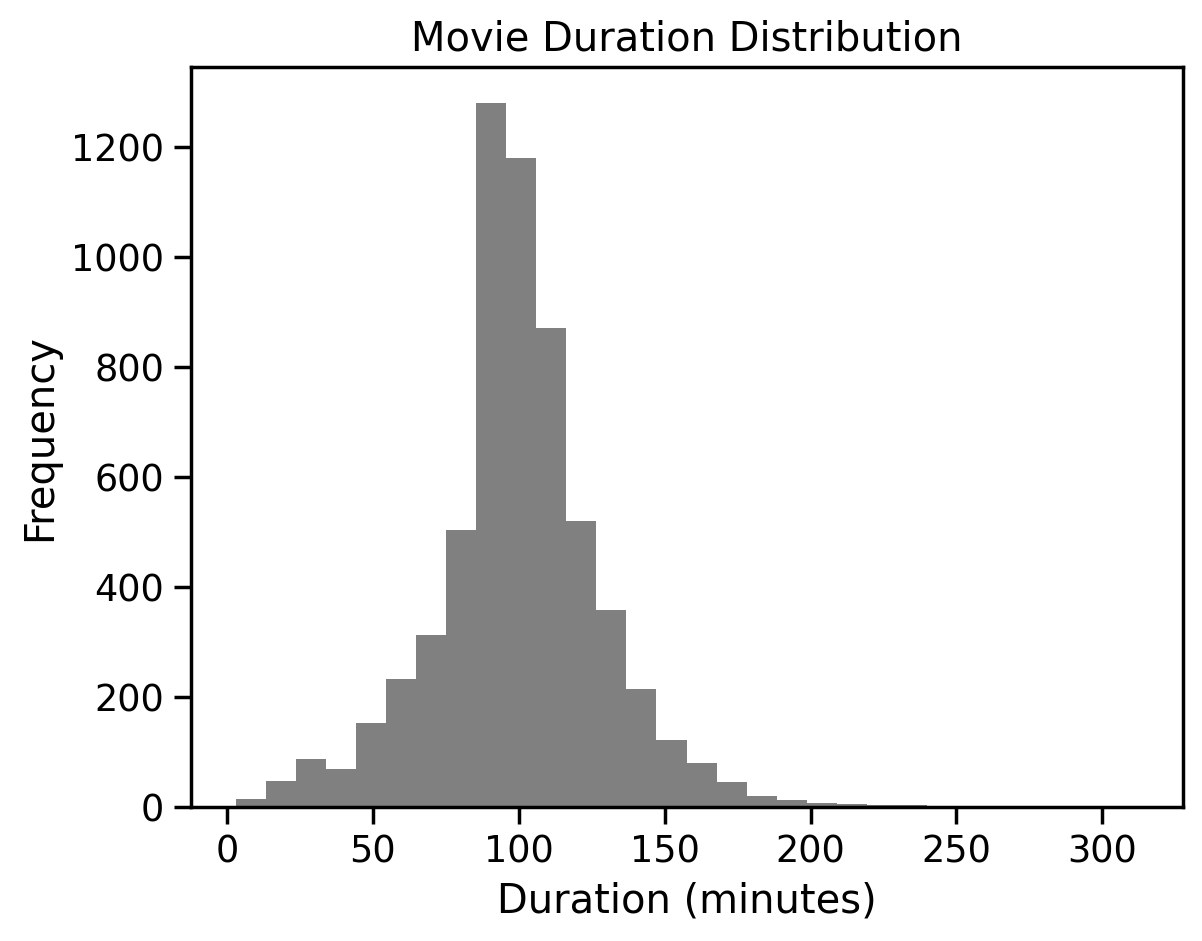

In [44]:
dfs["duration_min"].to_pandas().plot.hist(title="Movie Duration Distribution", color="gray", bins=30, xlabel="Duration (minutes)")

## Parquet

### Dive into Parquet Format: What is Parquet?

**Parquet** is a columnar storage file format designed for efficient data processing. It is widely used in big data frameworks like Spark and Hive.

[https://docs.pola.rs/user-guide/io/parquet/](https://docs.pola.rs/user-guide/io/parquet/)

**Advantages of Parquet:**

- Compact storage through compression
- Faster read/write times for columnar operations
- Schema evolution support

### Using Parquet with `polars`

In [45]:
# Save as Parquet
df.write_parquet("netflix_titles.parquet")

In [46]:
# Load from Parquet
parquet_df = pl.read_parquet("netflix_titles.parquet")
print(parquet_df)

shape: (8_807, 12)
┌─────────┬─────────┬─────────────┬─────────────┬───┬────────┬───────────┬────────────┬────────────┐
│ show_id ┆ type    ┆ title       ┆ director    ┆ … ┆ rating ┆ duration  ┆ listed_in  ┆ descriptio │
│ ---     ┆ ---     ┆ ---         ┆ ---         ┆   ┆ ---    ┆ ---       ┆ ---        ┆ n          │
│ str     ┆ str     ┆ str         ┆ str         ┆   ┆ str    ┆ str       ┆ str        ┆ ---        │
│         ┆         ┆             ┆             ┆   ┆        ┆           ┆            ┆ str        │
╞═════════╪═════════╪═════════════╪═════════════╪═══╪════════╪═══════════╪════════════╪════════════╡
│ s1      ┆ Movie   ┆ Dick        ┆ Kirsten     ┆ … ┆ PG-13  ┆ 90 min    ┆ Documentar ┆ As her     │
│         ┆         ┆ Johnson Is  ┆ Johnson     ┆   ┆        ┆           ┆ ies        ┆ father     │
│         ┆         ┆ Dead        ┆             ┆   ┆        ┆           ┆            ┆ nears the  │
│         ┆         ┆             ┆             ┆   ┆        ┆          

Performance Showcase

We'll benchmark `polars` and `pandas` using a large dataset.

### Benchmark Code

In [48]:
import pandas as pd
import time

# Pandas Benchmark
start = time.time()
pandas_df = pd.read_csv("../99_files/netflix_titles.csv")
pandas_filtered = pandas_df[(pandas_df["type"] == "Movie") & (pandas_df["release_year"] > 2015)]
print("Pandas Time:", time.time() - start)

# Polars Benchmark
start = time.time()
polars_df = pl.read_csv("../99_files/netflix_titles.csv")
polars_filtered = polars_df.filter((pl.col("type") == "Movie") & (pl.col("release_year") > 2015))
print("Polars Time:", time.time() - start)

# Polars Benchmark parquet
start = time.time()
polars_df = pl.read_parquet("netflix_titles.parquet")
polars_filtered = polars_df.filter((pl.col("type") == "Movie") & (pl.col("release_year") > 2015))
print("Polars Time:", time.time() - start)

Pandas Time: 0.04198193550109863
Polars Time: 0.0042760372161865234
Polars Time: 0.0034940242767333984


### Expected Results

- `polars` will outperform `pandas` significantly in terms of speed and memory usage.

### **Summary**

1. **`polars` vs `pandas`:**
    - Faster, more efficient for large datasets
    - Lazy evaluation for complex pipelines
2. **Parquet Format:**
    - Ideal for compact, efficient storage
    - Works seamlessly with `polars`